# Introduction

---

In this notebook, we will explore different tokenization algorithms provided by the Hugging Face's `tokenizers` library. We will use the following tokenizers:

1. **Byte-Pair Encoding (BPE)**: BPE is a subword tokenization algorithm that replaces the most common pair of bytes in a sequence with a single byte that is not present within that sequence.

2. **Byte-Level BPE**: Byte-Level BPE is a variant of BPE that operates at the byte level, allowing it to naturally handle any language and not be sensitive to out-of-vocabulary words.

3. **SentencePiece**: SentencePiece is a language-independent subword tokenizer and detokenizer designed for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training.

4. **WordPiece**: WordPiece is a subword tokenization algorithm that was used in BERT and other major transformer models. It iteratively creates a fixed-size vocabulary of individual characters, subwords, and words that best fits our language data.

5. **Character-Level Tokenization**: Character-Level Tokenization is a type of tokenization that splits text into individual characters.

For each tokenizer, we will train it on a sentence from the 'emot' dataset and then use it to encode the same sentence. The `train_from_iterator` method is used to train the tokenizer on the sentence, and the `encode` method is used to encode the sentence into tokens.

---



In [9]:
from tokenizers import Tokenizer, SentencePieceBPETokenizer, ByteLevelBPETokenizer, CharBPETokenizer
from tokenizers.models import BPE, WordPiece
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import WordPieceTrainer

# Load the 'ag_news' dataset
dataset = load_dataset('ag_news')

# Get the first sentence from the dataset
sentence = dataset['train'][0]['text']
print(f"Raw Sentence : {sentence}")

Raw Sentence : Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.


### What exactly are tokenizer models

Tokenizers are not parameterized in the same way as machine learning models. They don't learn from data through optimization of a loss function. Instead, they are rule-based systems that follow a specific set of instructions to convert text into tokens.

However, tokenizers do have configurations or settings that can be adjusted, such as the vocabulary size, the specific subword algorithm to use (BPE, Unigram, WordPiece, etc.), and the special tokens to recognize (like <PAD>, <EOS>, etc.). These can be considered as "parameters" in a broader sense.

The "model" in a tokenizer typically refers to the following components:

1. Vocabulary: This is a list of tokens that the tokenizer knows about. In subword tokenizers, this includes common words, subwords, and individual characters.

2. Rules: These are the specific instructions that the tokenizer follows to convert text into tokens. For example, in a BPE tokenizer, the rules might specify how to split a word into subwords based on the most common splits in the training data.

3. Settings or Configurations: These are additional settings that control the behavior of the tokenizer, such as whether to lower case the text, how to handle out-of-vocabulary words, and so on.

These components are typically learned or defined during the training phase of the tokenizer, where it is exposed to a large amount of text data and learns how to best tokenize that data. Once trained, the tokenizer can be saved and loaded for use in tokenizing new text.

### How does tokenizer model's representation looks like ?

A tokenizer is typically stored as a binary file that includes all the necessary information to perform tokenization. This includes the vocabulary, the rules for splitting text into tokens, and any other configurations or settings.

The exact format of the file and the representation of the tokenizer can vary depending on the specific tokenizer and library. For example, in the Hugging Face's tokenizers library, a tokenizer can be saved to a file using the tokenizer.save_model() method, which saves the tokenizer as two files: a .json file for the tokenizer's configuration and a .vocab file for the vocabulary.

The .json file contains a JSON object with various fields that represent the tokenizer's configuration. This might include fields like model_type (the type of tokenizer), vocab_size (the size of the vocabulary), and special_tokens_map (a mapping of special tokens).

The .vocab file contains the tokenizer's vocabulary. Each line in the file represents a token, and the line number represents the token's ID. For example, if the word "the" is on the 10th line, then its ID is 10.

When loaded into memory, the tokenizer is represented as an object with methods for tokenizing and detokenizing text, as well as other operations. The exact structure of this object can vary depending on the specific tokenizer and library.

### Different Pretrained Tokenizers

Hugging Face's transformers library provides a wide range of pre-trained tokenizers. These tokenizers correspond to the pre-trained models available in the library. Here are some of the pre-trained tokenizers available:

* [BERT Tokenizer](https://huggingface.co/google-bert/bert-base-uncased): This tokenizer uses WordPiece tokenization. It's used with the BERT model. You can load it using BertTokenizer.from_pretrained('bert-base-uncased').

* [GPT-2 Tokenizer](https://huggingface.co/docs/transformers/en/model_doc/gpt2): This tokenizer uses Byte-Pair Encoding (BPE). It's used with the GPT-2 model. You can load it using GPT2Tokenizer.from_pretrained('gpt2').

* [RoBERTa Tokenizer](https://huggingface.co/docs/transformers/model_doc/roberta): This tokenizer also uses Byte-Pair Encoding (BPE), but with some differences from the GPT-2 tokenizer. It's used with the RoBERTa model. You can load it using RobertaTokenizer.from_pretrained('roberta-base').

* [DistilBERT Tokenizer](https://huggingface.co/distilbert/distilbert-base-uncased): This tokenizer uses WordPiece tokenization. It's used with the DistilBERT model. You can load it using DistilBertTokenizer.from_pretrained('distilbert-base-uncased').

* [T5 Tokenizer](https://huggingface.co/docs/transformers/en/model_doc/t5): This tokenizer uses SentencePiece tokenization. It's used with the T5 model. You can load it using T5Tokenizer.from_pretrained('t5-base').

* [Llama2](https://huggingface.co/docs/transformers/en/model_doc/llama2) - BPE based on Sentencepiece


### tokenizer.encode()

The `tokenizer.encode(sentence)` function is used to convert a sentence into a format that can be used as input for a model. The function takes a string of text and returns an `Encoding` object, which contains the encoded sequence, the attention mask, the type ids, and other information.

Here's a step-by-step breakdown of what happens when you call this function:

1. **Tokenization**: The function first splits the input text into tokens. The way this is done depends on the type of tokenizer. For example, a WordPiece tokenizer would split words into smaller subwords if they're not in its vocabulary.

2. **Conversion to IDs**: The function then converts each token into an integer ID. These IDs correspond to the indices of the tokens in the tokenizer's vocabulary.

3. **Padding and Truncation**: If you've specified a maximum length for the sequences, the function will truncate sequences that are too long and pad sequences that are too short.

4. **Creation of Attention Mask**: The function creates an attention mask, which is a sequence of 1s and 0s indicating which tokens the model should pay attention to. Tokens that are part of the input text are marked with 1, and padding tokens are marked with 0.

5. **Creation of Type IDs**: If the tokenizer supports it, the function creates type IDs, which are used to distinguish different sentences in tasks that involve multiple sentences.

6. **Return `Encoding` Object**: Finally, the function returns an `Encoding` object, which contains the encoded sequence, the attention mask, the type ids, and other information.

The `tokenizer.encode(sentence)` function takes the following arguments:

- `sentence` (str): The text to be encoded.

There are also several optional arguments that you can use to customize the encoding process, such as `add_special_tokens`, `max_length`, `truncation`, and `padding`. You can find more information about these arguments in the [Hugging Face Tokenizers documentation](https://huggingface.co/docs/tokenizers/python/latest/api/reference.html#tokenizers.Encoding).

### Training your own tokenizer

In [20]:
"""

### TOKENIZER INSTANTIATION ####
tokenizer = Tokenizer(BPE()): creates a new tokenizer using the Byte-Pair Encoding (BPE) model. 
BPE is a subword tokenization algorithm that replaces the most common pair of bytes in a sequence with a 
single byte that is not present within that sequence.


The BPE class in the Hugging Face's tokenizers library takes two arguments: vocab and merges.

* vocab: This is a dictionary that maps each token to a unique integer ID. 
If you have pre-trained a tokenizer and saved its vocabulary, you can load this vocabulary using the vocab argument. 
If you don't provide a vocab, the tokenizer will learn a vocabulary from the text it's trained on.

* merges: This is a list of merge operations used to construct the BPE vocabulary. 
Each merge operation is a tuple of two tokens. The tokenizer uses these merge operations to split words into subwords. 
If you have pre-trained a tokenizer and saved its merge operations, you can load these merge operations using the merges argument. 
If you don't provide merges, the tokenizer will learn merge operations from the text it's trained on.

Example : Creating your own tokenizer
    
    # Load a pre-trained vocabulary and merge operations
    vocab = {"a": 0, "b": 1, "c": 2}
    merges = [("a", "b"), ("b", "c")]

    # Create a BPE tokenizer with the pre-trained vocabulary and merge operations
    tokenizer = Tokenizer(models.BPE(vocab=vocab, merges=merges))


### FETCH THE SENTENCE FROM ITERATOR ###
tokenizer.train_from_iterator([sentence]): Trains the tokenizer on the provided sentence. The train_from_iterator method 
takes an iterator of sentences and trains the tokenizer on them. 
In this case, the iterator contains only one sentence. 
Training the tokenizer allows it to learn the vocabulary of the text it's trained on.


### ENCODING 
output = tokenizer.encode(sentence): This line uses the trained tokenizer to encode the sentence into tokens. 
The encode method takes a sentence and returns an Encoding object, which contains the encoded sequence, 
the attention mask, the type ids, and other information.

"""


# Byte-Pair Encoding (BPE)
# Load the dataset
dataset = load_dataset('ag_news')

# Extract the text data
texts = [example['text'] for example in dataset['train']]

# Define a tokenizer model
tokenizer = Tokenizer(models.BPE())

# Define a trainer
trainer = trainers.BpeTrainer(vocab_size=20000, special_tokens=["<s>", "<pad>", "</s>", "<unk>", "<mask>"])

# Train the tokenizer
tokenizer.train_from_iterator(texts, trainer=trainer)

# Test the tokenizer with a sentence
sentence = "This is a test sentence."
output = tokenizer.encode(sentence)

print("Byte-Pair Encoding (BPE)")
print(output.tokens)




Byte-Pair Encoding (BPE)
['This ', 'is a ', 'test ', 'sentenc', 'e.']


In [23]:
# Byte-Level BPE
print("Byte-Level BPE")
# Define a tokenizer model
tokenizer = ByteLevelBPETokenizer()

# Train the tokenizer
tokenizer.train_from_iterator(texts, vocab_size=20000, min_frequency=2, special_tokens=["<s>", "<pad>", "</s>", "<unk>", "<mask>"])

# Test the tokenizer with a sentence
sentence = "This is a test sentence."
output = tokenizer.encode(sentence)

print("\nByte-Level BPE")
print(output.tokens)

Byte-Level BPE




Byte-Level BPE
['This', 'Ġis', 'Ġa', 'Ġtest', 'Ġsentence', '.']


### What is the special character `Ġ`

* The Byte-Level BPE tokenizer from Hugging Face's `tokenizers` library uses a special character `Ġ` (U+0120: Latin Capital Letter G with stroke) to represent spaces between words. 

* This is because Byte-Level BPE operates at the byte level, treating text as a sequence of Unicode bytes. This allows it to handle any language and any character, including special and rare characters. 

* When a space character appears at the beginning of a word (i.e., the word is not the first word in a sentence), it is replaced with the special character `Ġ`. This is why you see `Ġ` before 'is', 'a', 'test', and 'sentence' in your tokenized output.

* When you decode the tokens back into text, these `Ġ` characters will be converted back into spaces.

In [26]:
# SentencePiece
tokenizer = SentencePieceBPETokenizer()

# Train the tokenizer
tokenizer.train_from_iterator(texts, vocab_size=20000, min_frequency=2, special_tokens=["<s>", "<pad>", "</s>", "<unk>", "<mask>"])

# Test the tokenizer with a sentence
sentence = "This is a test sentence."
output = tokenizer.encode(sentence)

print("SentencePiece")
print(output.tokens)




SentencePiece
['▁This', '▁is', '▁a', '▁test', '▁sentence', '.']


### Why _ in sentencepiece tokenizer:

The underscore `_` before each token in SentencePiece's output represents a space character in the original text. 

SentencePiece treats whitespace as a regular symbol just like alphabets and digits. This is different from many other tokenizers which treat whitespace as a special character to split tokens.

When SentencePiece tokenizes a sentence, it adds an underscore `_` before the token if the token was preceded by a space in the original text. This helps in preserving the original spacing information in the tokenized output.

For example, if you have the sentence "This is a test", SentencePiece might tokenize it as `["_This", "_is", "_a", "_test"]`. When you detokenize it, you can simply join the tokens together and replace underscores with spaces to get back the original sentence.

In [27]:
# WordPiece
# Define a tokenizer model
tokenizer = Tokenizer(models.WordPiece(unk_token="[UNK]"))

# Define a trainer
trainer = trainers.WordPieceTrainer(vocab_size=20000, special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

# Train the tokenizer
tokenizer.train_from_iterator(texts, trainer=trainer)

# Test the tokenizer with a sentence
sentence = "This is a test sentence."
output = tokenizer.encode(sentence)

print("WordPiece")
print(output.tokens)




WordPiece
['This ', '##is a ', '##test ', '##sentenc', '##e.']


The WordPiece tokenizer is a subword tokenizer that splits words into smaller units (subwords or characters), which helps to handle out-of-vocabulary words. 

In the output you provided, `['This ', '##is a ', '##test ', '##sentenc', '##e.']`, the `##` symbol before a token indicates that this token is a continuation of the previous token, i.e., it's part of the same word.

Here's a breakdown of the output:

- `'This '`: This is a whole word, so it doesn't have `##` before it.
- `'##is a '`: The `##` indicates that "is" is a continuation of the previous token. However, in this case, it seems like there might be a mistake in the tokenization because "is" is a separate word, not a continuation of "This". The same applies to "a".
- `'##test '`: The `##` indicates that "test" is a continuation of the previous token. Again, this seems like a mistake because "test" is a separate word.
- `'##sentenc'`, `'##e.'`: Here, the word "sentence" has been split into two tokens: "sentenc" and "e.". The `##` before "e." indicates that it's a continuation of "sentenc".

Please note that the WordPiece tokenizer is trained on the specific dataset and the way it splits words into tokens depends on the words and subwords it has seen in the training data. If the training data is different, the tokenization might also be different.

### Difference between SentencePieceBPETokenizer and BPE

<span style="color:green">
The SentencePieceBPETokenizer and BPE (Byte Pair Encoding) are both subword tokenization methods, but they have some differences in their approach and implementation.

Byte Pair Encoding (BPE): BPE is a subword tokenization method that replaces the most frequent pair of bytes in a sequence with a single, 
unused byte. The process is repeated iteratively on the corpus of text. BPE helps to handle out-of-vocabulary words by breaking 
them down into subwords that the model has seen before. 
BPE doesn't require pre-tokenization of the text into words, but it's often used in combination with word tokenization.

SentencePieceBPETokenizer: SentencePiece is a library developed by Google that implements BPE and unigram language model 
with the extension of direct training from raw sentences. SentencePieceBPETokenizer is a BPE implementation from the 
SentencePiece library. The key difference is that SentencePieceBPETokenizer treats the input as a raw input stream, 
thus making it language-agnostic and able to handle languages without explicit word boundaries (like Japanese or Chinese). 
It also normalizes the text (like lowercasing, unicode normalization) as part of its processing pipeline.
</span>

In [29]:
# Character-Level Tokenization
# Define a tokenizer model
tokenizer = CharBPETokenizer()

# Train the tokenizer
tokenizer.train_from_iterator(texts, vocab_size=20000, min_frequency=2, special_tokens=["<s>", "<pad>", "</s>", "<unk>", "<mask>"])

# Test the tokenizer with a sentence
sentence = "This is a test sentence."
output = tokenizer.encode(sentence)

print("\nCharacter-Level Tokenization")
print(output.tokens)





Character-Level Tokenization
['This</w>', 'is</w>', 'a</w>', 'test</w>', 'sentence</w>', '.</w>']


Character-level tokenization, as the name suggests, tokenizes text at the character level. However, in the case of the `CharBPETokenizer` from the Hugging Face's `tokenizers` library, it's a bit more nuanced. It's actually a Byte-Pair Encoding (BPE) tokenizer that operates at the character level.

In the output you provided, `['This</w>', 'is</w>', 'a</w>', 'test</w>', 'sentence</w>', '.</w>']`, each token represents a whole word from the original sentence. The `</w>` at the end of each token is a special symbol that the `CharBPETokenizer` uses to indicate the end of a word.

Here's a breakdown of the output:

- `'This</w>'`: The token "This" followed by the `</w>` symbol, indicating the end of the word.
- `'is</w>'`: The token "is" followed by the `</w>` symbol, indicating the end of the word.
- `'a</w>'`: The token "a" followed by the `</w>` symbol, indicating the end of the word.
- `'test</w>'`: The token "test" followed by the `</w>` symbol, indicating the end of the word.
- `'sentence</w>'`: The token "sentence" followed by the `</w>` symbol, indicating the end of the word.
- `'.</w>'`: The token "." followed by the `</w>` symbol, indicating the end of the word.

In this case, because each word in the sentence is a token in the vocabulary, the `CharBPETokenizer` doesn't need to split any words into smaller subwords or characters. If a word wasn't in the vocabulary, the tokenizer would split it into smaller subwords or individual characters that are in the vocabulary.

### Why differente tokenizers have different representation of the end and spacing between tokens, like #, _ etc

Different tokenizers use different representations for spaces and word boundaries to handle the complexities of natural language text. The choice of representation often depends on the specific design and goals of the tokenizer. Here are a few reasons why different tokenizers might use different symbols:

1. **To Preserve Information**: Spaces and word boundaries are important pieces of information in text. By using special symbols to represent them, tokenizers can preserve this information through the tokenization and detokenization processes.

2. **To Handle Different Languages and Scripts**: Different languages and scripts have different rules for word boundaries and spacing. Some languages don't use spaces between words at all. By using special symbols, tokenizers can handle a wide variety of languages and scripts.

3. **To Improve Model Performance**: Some symbols might lead to better performance in downstream tasks. For example, the WordPiece tokenizer uses `##` to indicate subwords, which helps models like BERT understand that these subwords are part of the same word.

4. **To Handle Special Cases**: Some symbols might be used to handle special cases. For example, the Byte-Level BPE tokenizer uses `Ġ` to represent spaces, which allows it to handle any character in the Unicode standard, including special and rare characters.

In general, the choice of symbols is a design decision made by the creators of the tokenizer, and different tokenizers might make different decisions based on their specific goals and requirements.

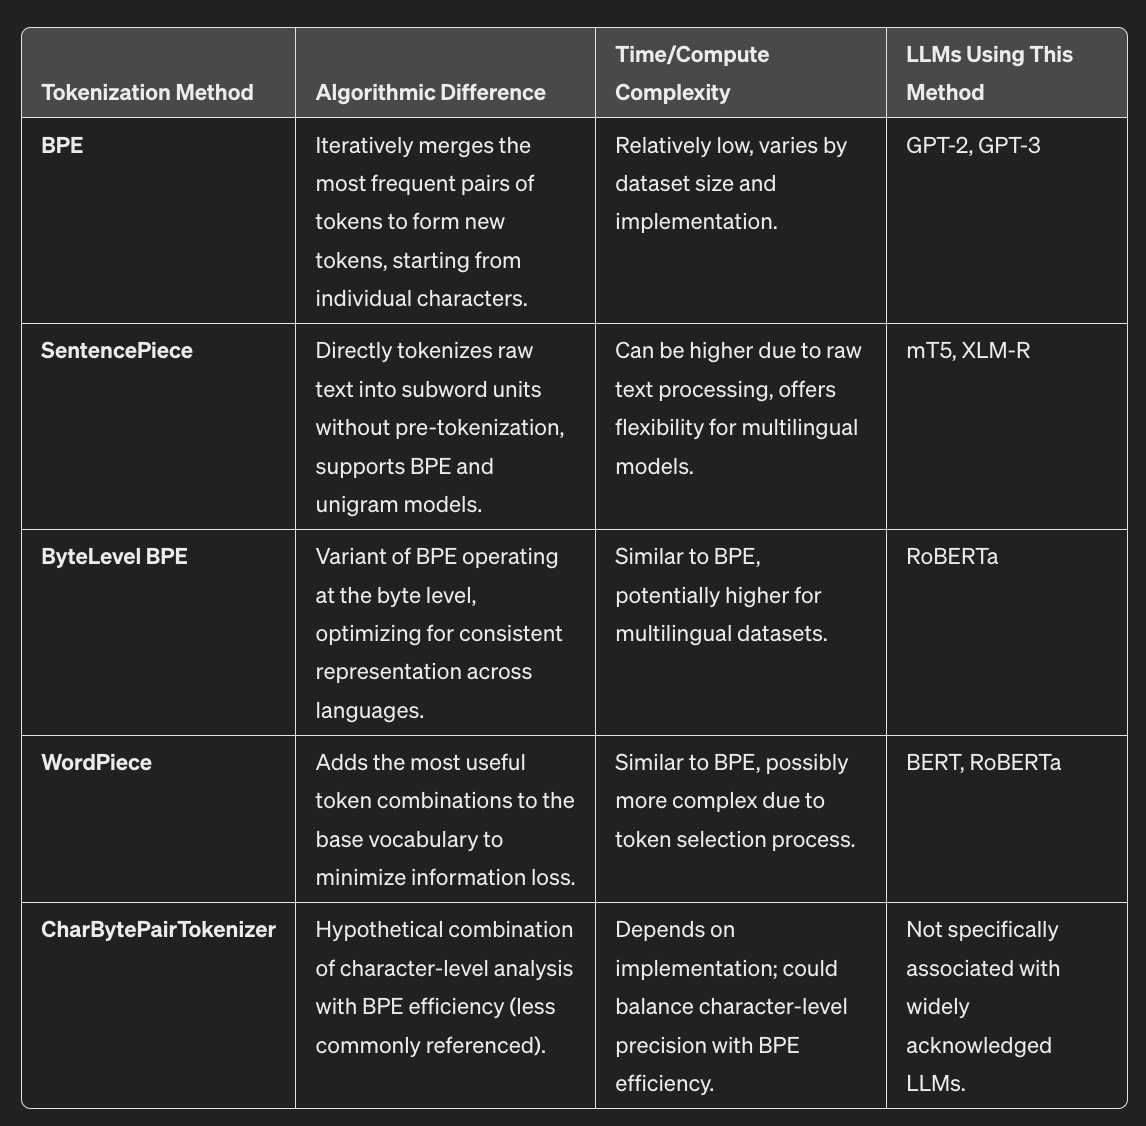